# ÏûîÏ∞®Î∂ÑÏÑù(Î™®ÎìàÌôî)

## #01. Ï§ÄÎπÑÏûëÏóÖ

### [1] Ìå®ÌÇ§ÏßÄ Ï∞∏Ï°∞

In [1]:
%%time

import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from help_a.regression import *
from help_a.util import *
from help_a.plot import *
from help_a.analysis import *

CPU times: total: 484 ms
Wall time: 729 ms


In [2]:
%%time

origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)
my_pretty_table(origin.head())

+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 | 

## #02. ÏÑ†ÌòïÌöåÍ∑Ä Î∂ÑÏÑù

MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |       0.745825 |             3.27197 |             21.8049 |          4.66958 |                         16.9054 |              -3.61383 |
| Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+------------+----------------+---------------------+---------------------+------------------+--

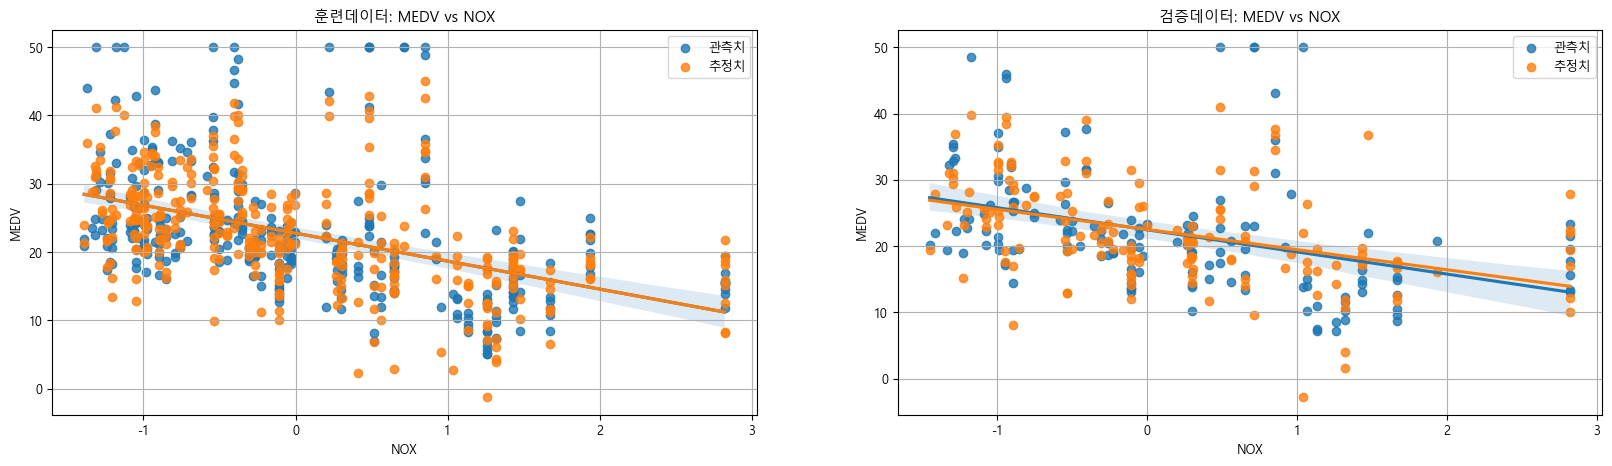

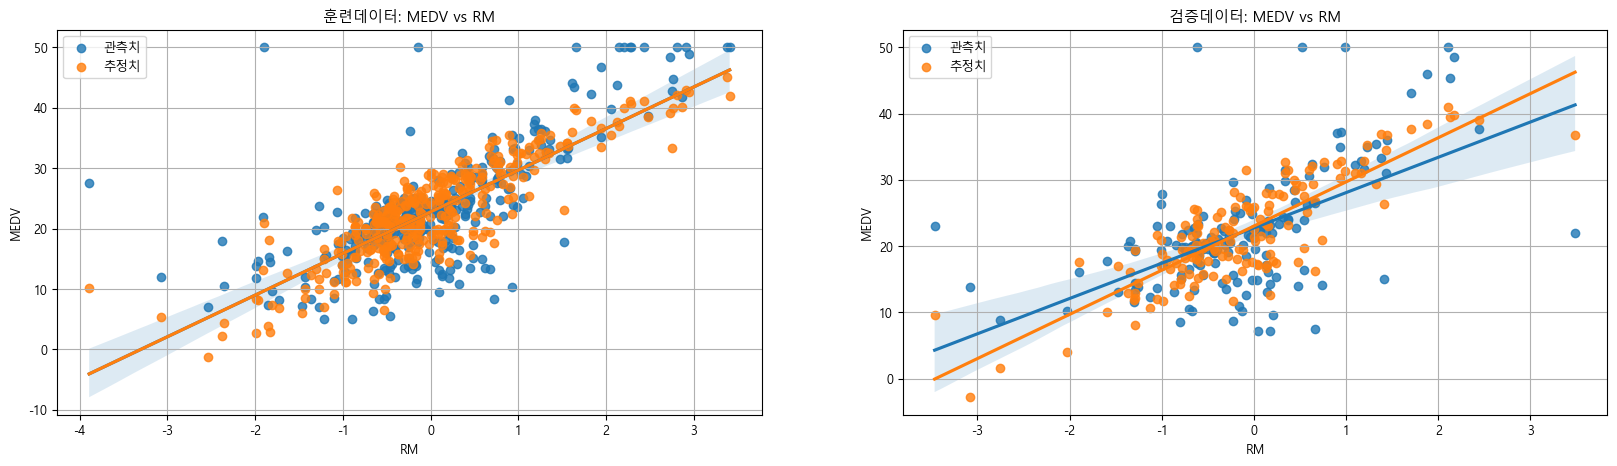

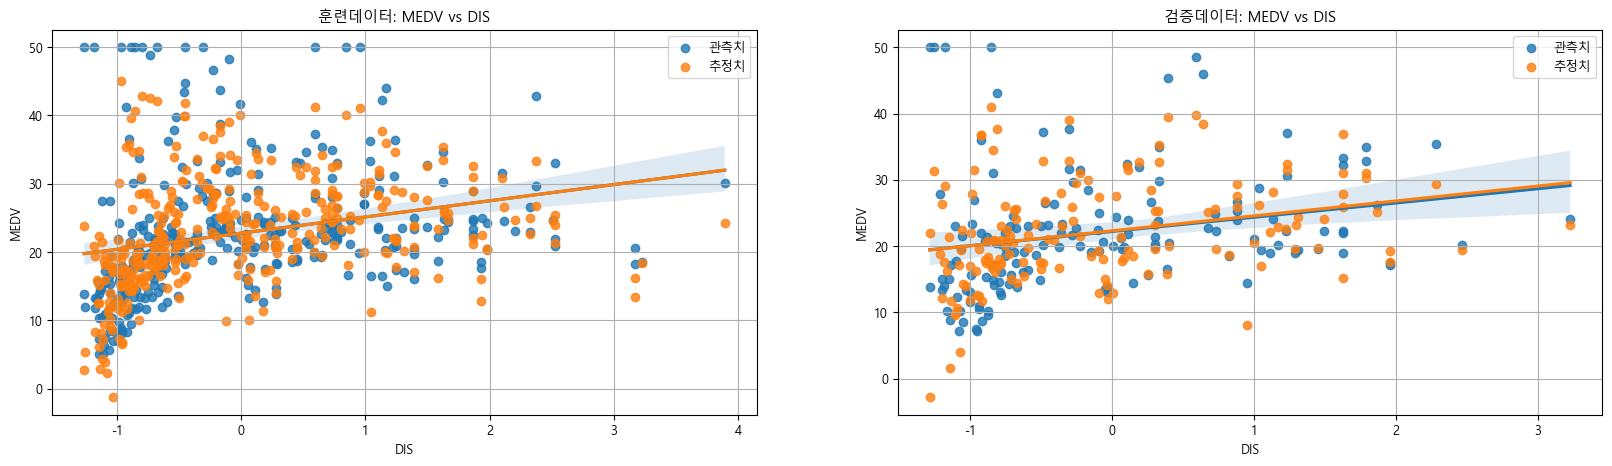

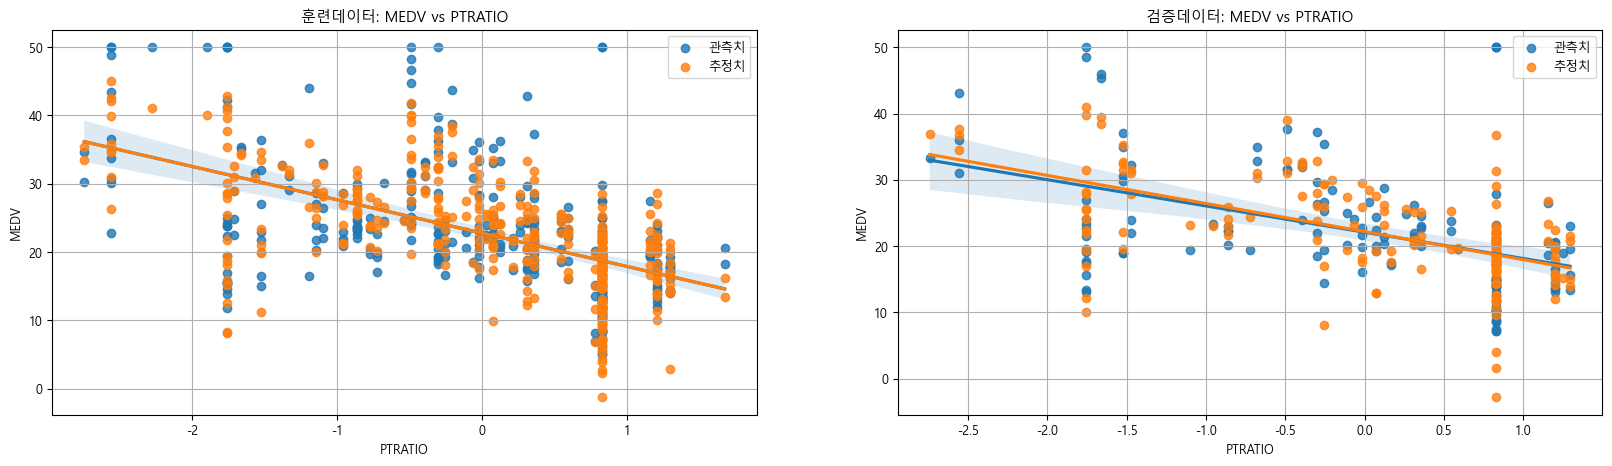

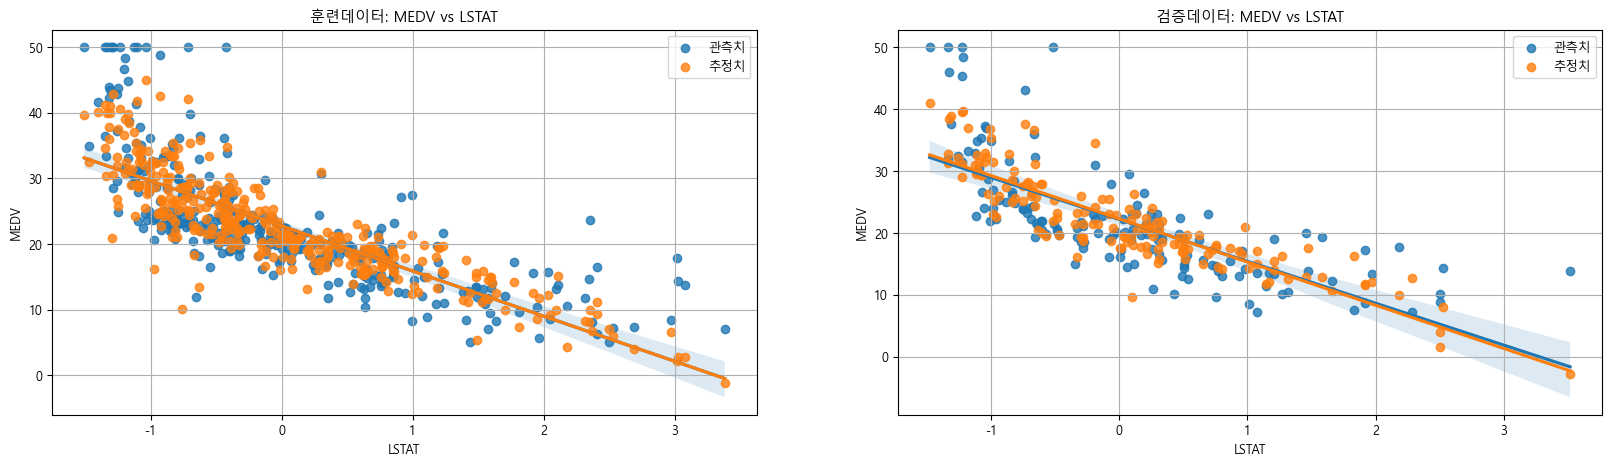

CPU times: total: 5.67 s
Wall time: 7.6 s


In [3]:
%%time

ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
df = origin.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df, yname="MEDV", scalling=True)

fit = my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=True, report=True, figsize=(10, 5), dpi=100)

## #03. ÏûîÏ∞® Î∂ÑÏÑù

### [1] ÏÑ†ÌòïÏÑ±

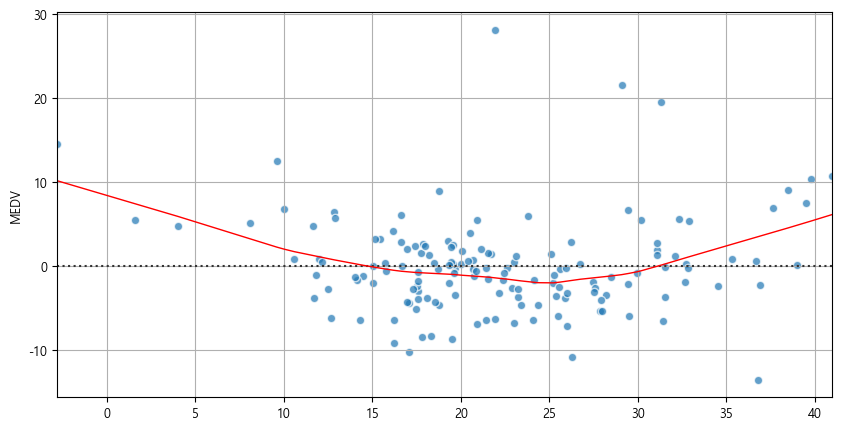

CPU times: total: 219 ms
Wall time: 273 ms


In [4]:
%%time

my_residplot(fit.y_test, fit.y_test_pred, lowess=True, figsize=(10, 5), dpi=100)

### [3] Ï†ïÍ∑úÏÑ±

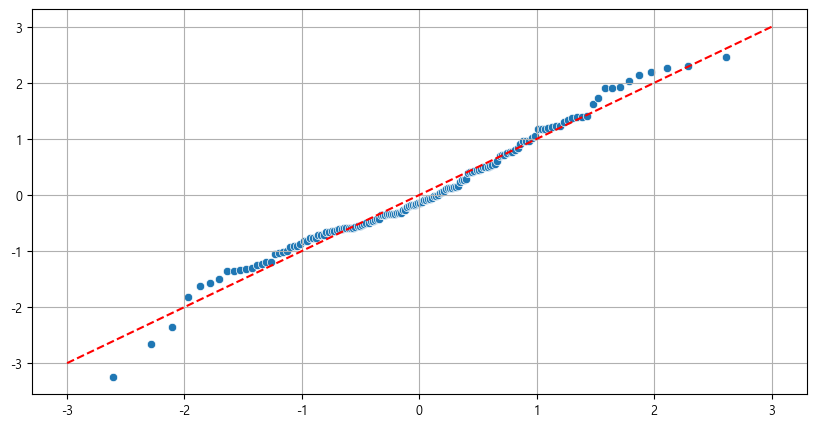

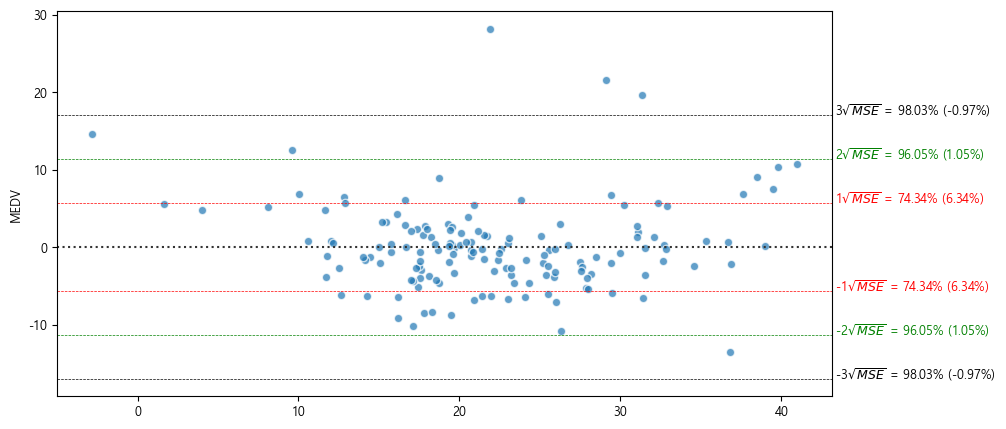

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 74.34% (6.3421052631579045)
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 96.05% (1.05263157894737)
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 98.03% (-0.973684210526315)
ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False
CPU times: total: 719 ms
Wall time: 1.21 s


In [5]:
%%time

my_qqplot(fit.y_test_pred, figsize=(10, 5), dpi=100)
my_residplot(fit.y_test, fit.y_test_pred, mse=True, figsize=(10, 5), dpi=100)
my_resid_normality(fit.y_test, fit.y_test_pred)

### [4] Îì±Î∂ÑÏÇ∞ÏÑ± (Î∏åÎ°úÏù¥Ïäà-Ìå®Í±¥ Í≤ÄÏ†ï)

In [6]:
%%time

my_resid_equal_var(fit.x_test, fit.y_test, fit.y_test_pred)

ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+
CPU times: total: 31.2 ms
Wall time: 5.27 ms


### [5] ÎèÖÎ¶ΩÏÑ±

In [7]:
%%time

my_resid_independence(fit.y_test, fit.y_test_pred)

Durbin-Watson: 1.9279407375238424, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True
CPU times: total: 0 ns
Wall time: 0 ns


### [6] Ï£ºÍ¥ÄÏ†ÅÏù¥ÏßÄ ÏïäÎÇò?

ÏúÑ Î∂ÑÏÑùÎì§ÏùÄ Î™®Îëê Ï£ºÍ¥ÄÏ†ÅÏúºÎ°ú Í≤∞Î°† ÎÇ¥Î¶¨Í≥† ÏûàÎäî Í≤ÉÏù¥ ÏÇ¨Ïã§Ïù¥Îã§. 

ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïñ¥Îñ§ p-valueÎ•º ÎÇ¥Îäî Í≤ÄÏ†ï Î∞©Î≤ïÏù¥ Ï∂©Î∂ÑÌûà Ï°¥Ïû¨ÌïòÍ≤†ÏßÄÎßå, ÌòÑÏû¨Î°úÏÑúÎäî ÎåÄÎ∂ÄÎ∂ÑÏùÄ Ï£ºÍ¥ÄÏ†ÅÏúºÎ°úÎßå ÌåêÎã®ÏùÑ ÎÇ¥Î¶¨Í≥† ÏûàÎäî Í≤ÉÏù¥ ÌòÑÏã§Ïù¥Îã§. 

ÏÑ∏ÏÉÅÏù¥ Î∞îÎÄåÍ≥† Í∞ùÍ¥ÄÏ†ÅÏù∏ Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶¨Í∏∞Î•º ÏöîÍµ¨ÌïòÎäî ÏãúÎåÄÍ∞Ä ÎèÑÎûòÌï†ÏßÄÎèÑ Î™®Î•¥ÏßÄÎßå, ÎßåÏïΩ Í∑∏Îü∞ ÏÑ∏ÎåÄÍ∞Ä Ïò®Îã§Î©¥, ÏïÑÎßàÎèÑ ÏúÑ Ï†ÑÏ†ú Ï°∞Í±¥Îì§ÏùÑ ÏóÑÍ≤©ÌïòÍ≤å Î™®Îëê ÎßåÏ°±ÌïòÎäî Îç∞Ïù¥ÌÑ∞Îäî Í∑∏Î¶¨ ÎßéÏßÄ ÏïäÏùÑ Í≤ÉÏù¥Îã§. 

ÏïÑÎßà ÌòÑÏû¨Î°úÏÑúÎèÑ Ïù¥Îü¨Ìïú ÌòÑÏã§Ï†ÅÏù∏ Ïù¥Ïú† ÎïåÎ¨∏Ïóê Í∑∏Î†áÍ≤åÍπåÏßÄ Í∞ÄÏ†ïÏùÑ Í≤ÄÏ†ïÌïòÎùºÍ≥† ÌïòÏßÄÎäî ÏïäÎäîÍ≤É Í∞ôÎã§.

> Ï∂úÏ≤ò: https://medistat.tistory.com/95

## #04. ÏûîÏ∞®Î∂ÑÏÑù ÏùºÍ¥Ñ ÏàòÌñâ

[ÏûîÏ∞®Ïùò ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ï]


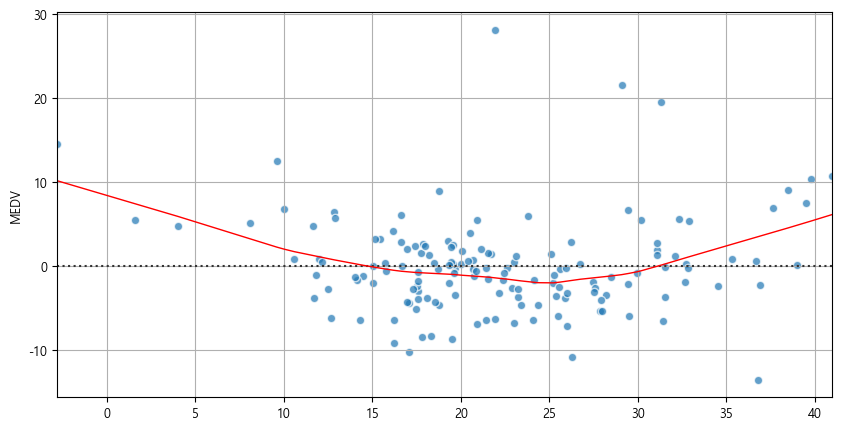


[ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï]


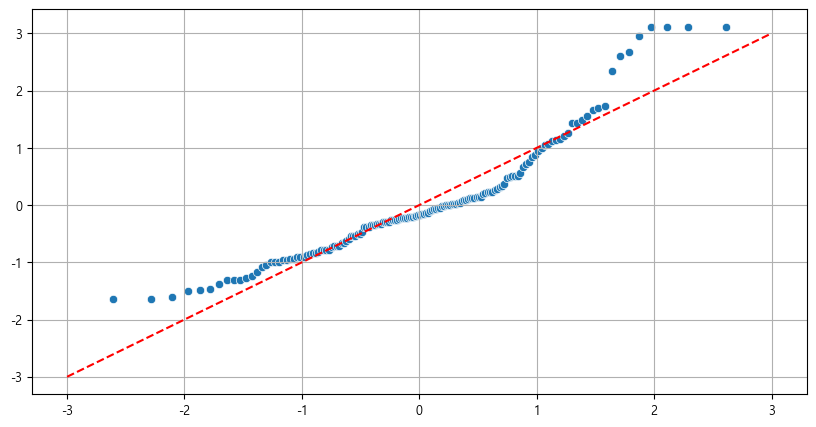

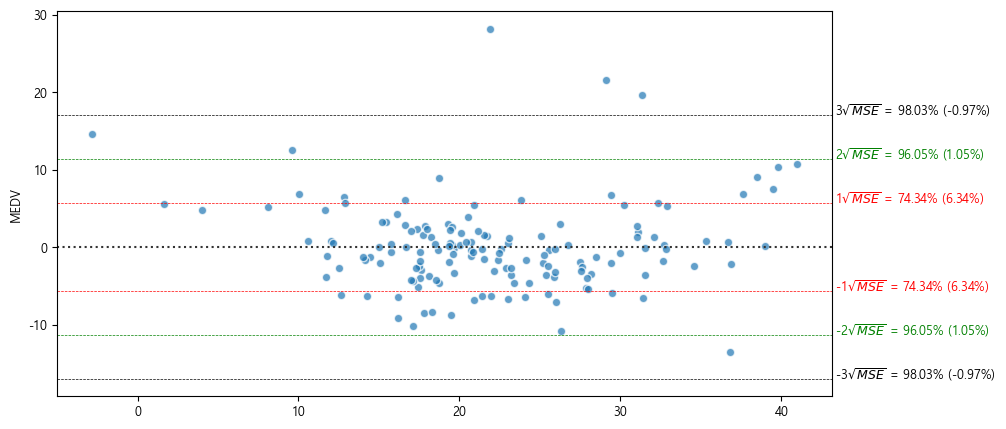

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 74.34% (6.3421052631579045)
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 96.05% (1.05263157894737)
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 98.03% (-0.973684210526315)
ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False

[ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï]
ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+

[ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï]
Durbin-Watson: 1.9279407375238424, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True
CPU times: total: 750 ms
Wall time: 924 ms


In [8]:
%%time

my_resid_test(fit.x_test, fit.y_test, fit.y_test_pred, figsize=(10, 5), dpi=100)

## #05. ÌöåÍ∑ÄÎ∂ÑÏÑù ÌõÑ ÏûîÏ∞®Î∂ÑÏÑùÍπåÏßÄ ÏùºÍ¥Ñ Ï≤òÎ¶¨

MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |       0.745825 |             3.27197 |             21.8049 |          4.66958 |                         16.9054 |              -3.61383 |
| Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+------------+----------------+---------------------+---------------------+------------------+--

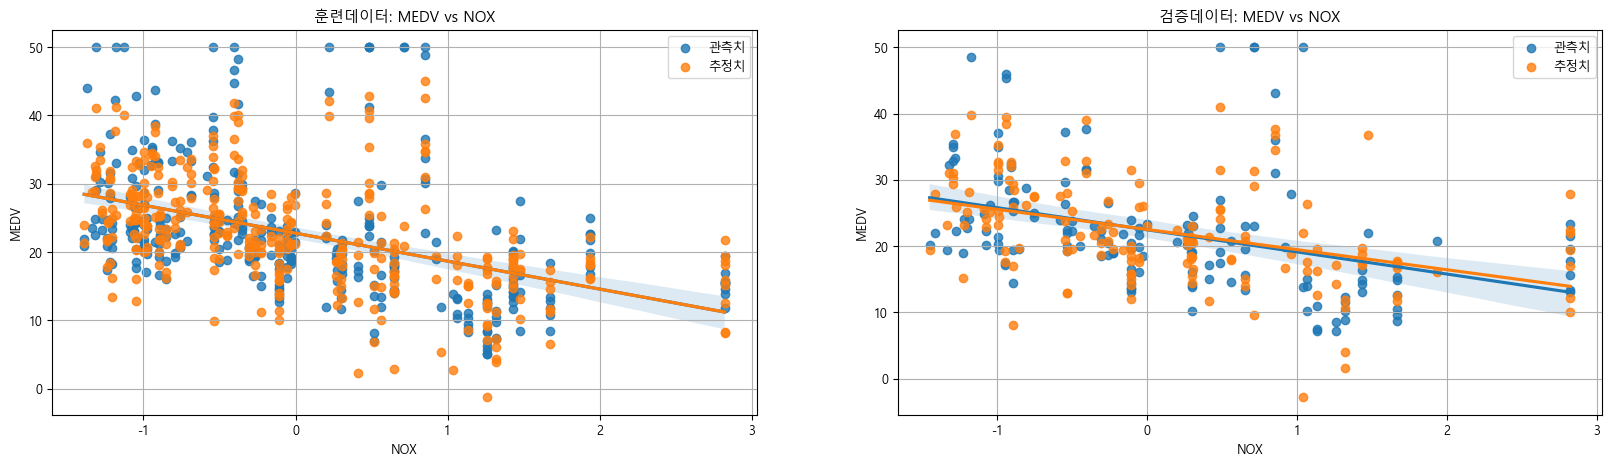

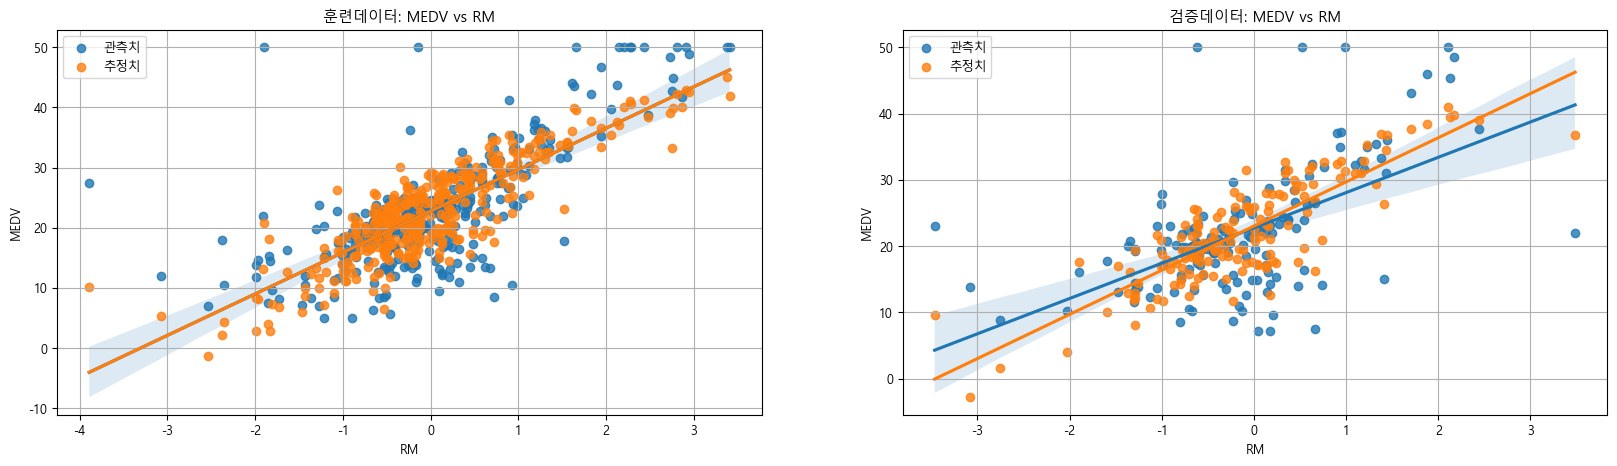

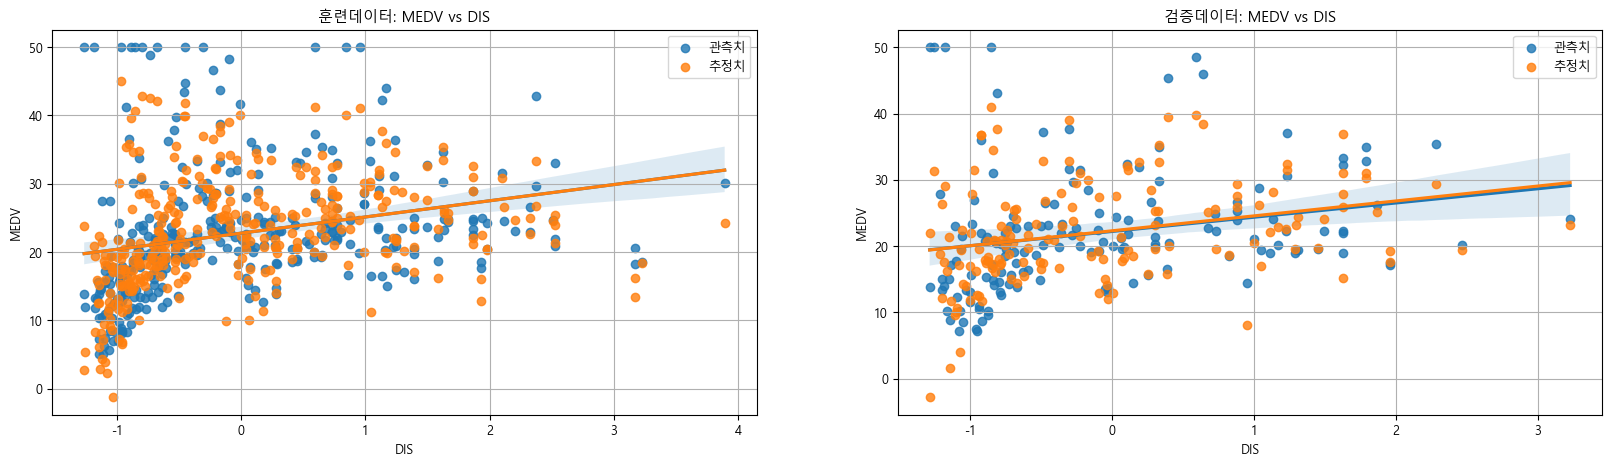

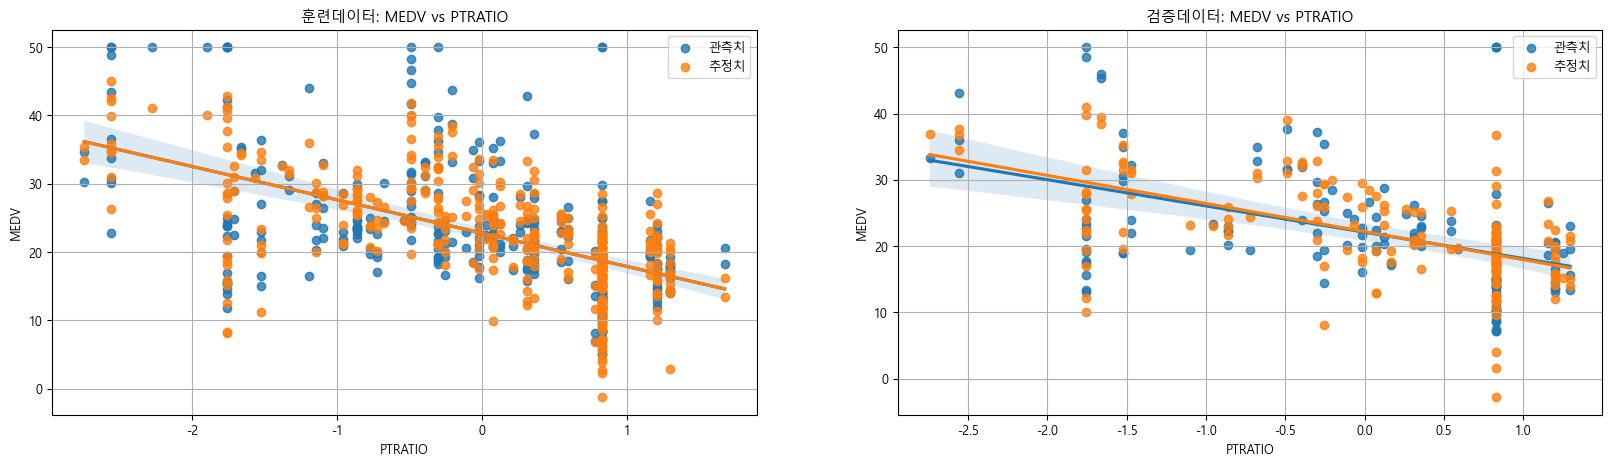

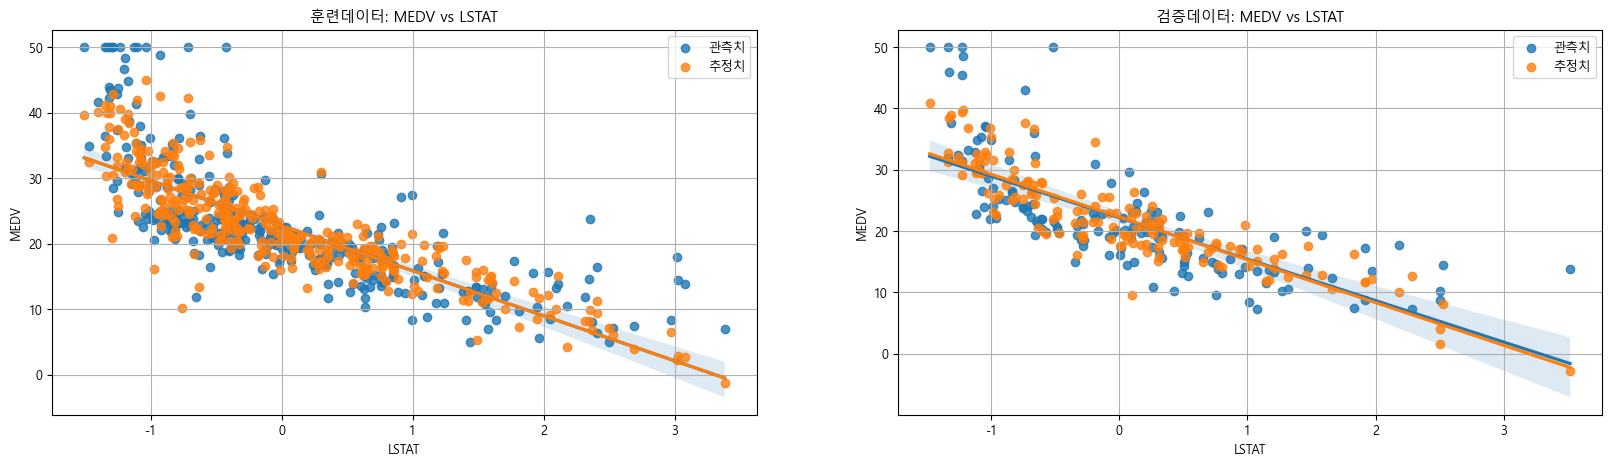



[ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏûîÏ∞®Ïùò Í∞ÄÏ†ï ÌôïÏù∏] ==============================
[ÏûîÏ∞®Ïùò ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ï]


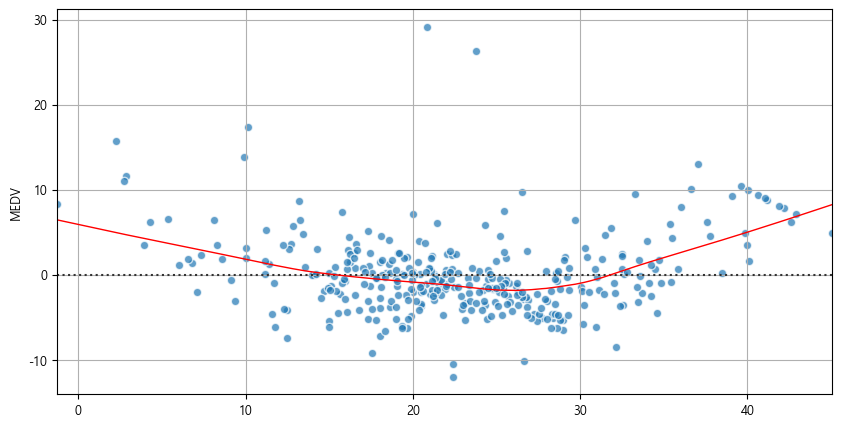


[ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï]


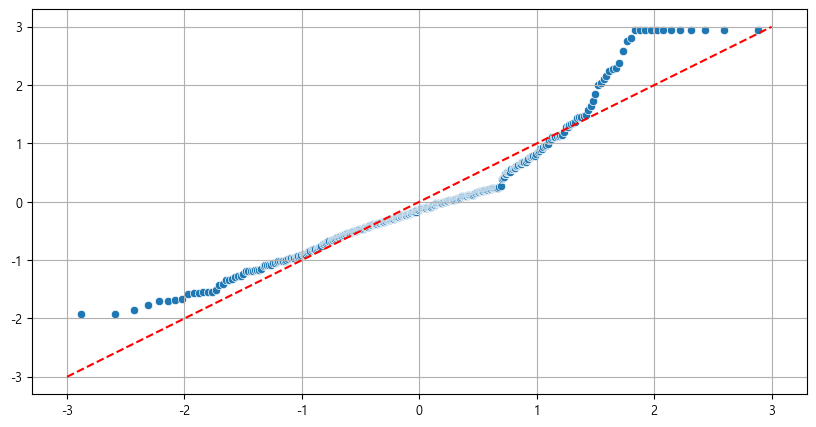

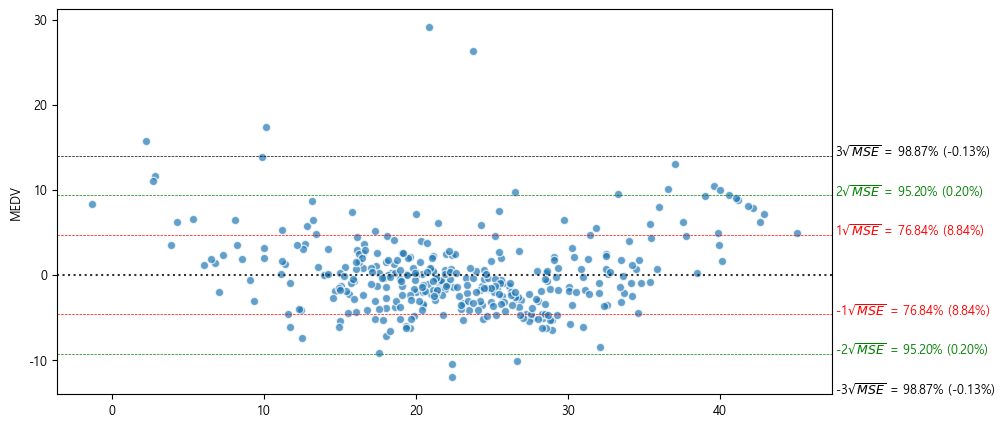

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 76.84% (8.836158192090394)
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 95.20% (0.197740112994353)
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 98.87% (-0.12994350282485811)
ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False

[ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï]
ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    17.6465 |
| p-value   | 0.00342368 |
| f-value   |     3.6515 |
| f p-value | 0.00311256 |
+-----------+------------+

[ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï]
Durbin-Watson: 2.124911983856234, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True


[Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏûîÏ∞®Ïùò Í∞ÄÏ†ï ÌôïÏù∏] ==============================
[ÏûîÏ∞®Ïùò ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ï]


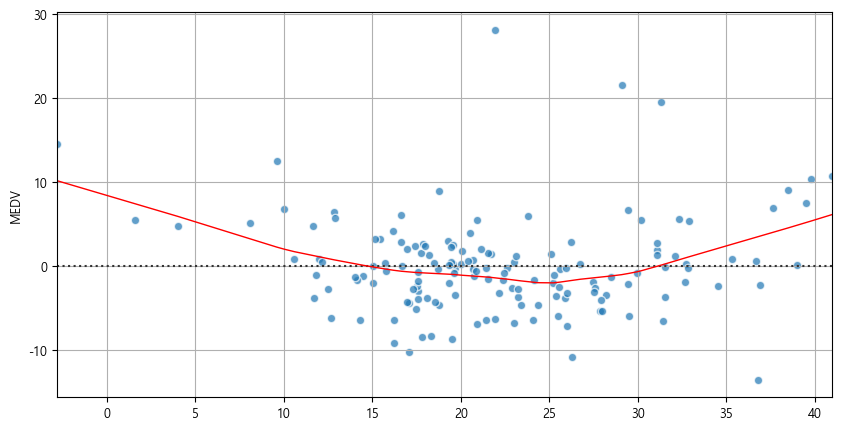


[ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï]


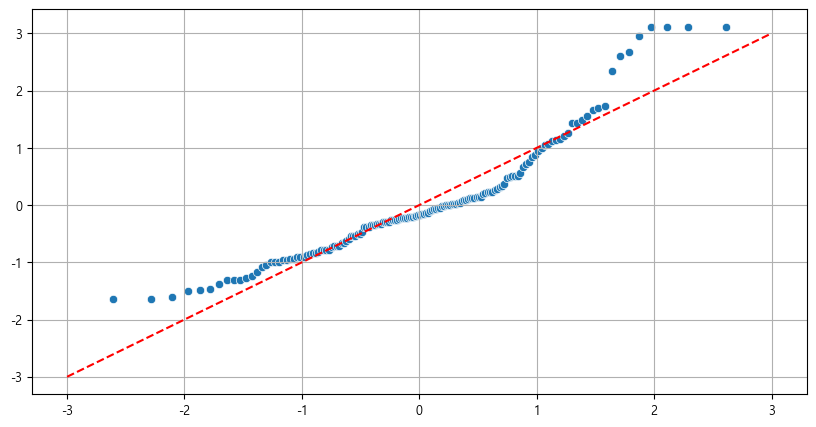

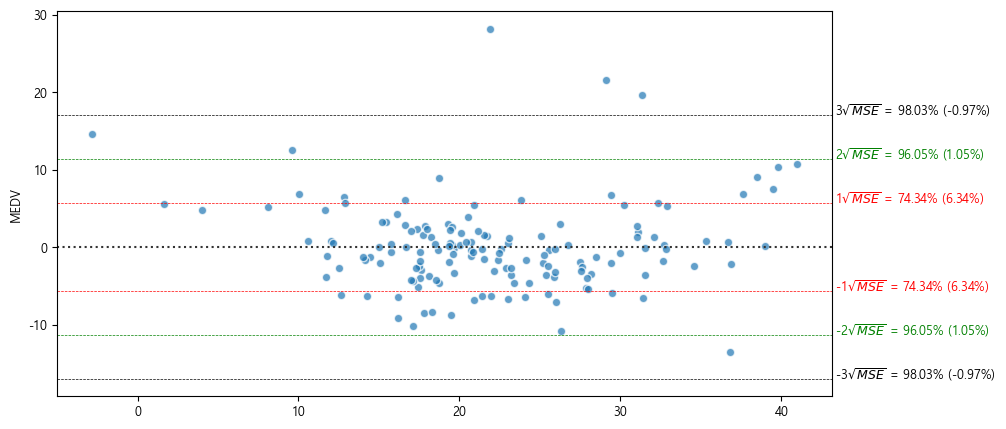

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 74.34% (6.3421052631579045)
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 96.05% (1.05263157894737)
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 98.03% (-0.973684210526315)
ÏûîÏ∞®Ïùò Ï†ïÍ∑úÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False

[ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï]
ÏûîÏ∞®Ïùò Îì±Î∂ÑÏÇ∞ÏÑ± Í∞ÄÏ†ï Ï∂©Ï°± Ïó¨Î∂Ä: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+

[ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï]
Durbin-Watson: 1.9279407375238424, ÏûîÏ∞®Ïùò ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True
CPU times: total: 6.58 s
Wall time: 8.9 s


LinearRegression()

In [9]:
%%time

my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=True, report=True, resid_test=True, figsize=(10, 5), dpi=100)